In [107]:
import numpy as np
from scipy.linalg import expm
from tqdm import tqdm

In [108]:
Jx = 2.0
Jz = 1.0

Sx = np.array([[0, 1], [1, 0]]) / 2
Sz = np.array([[1, 0], [0, -1]]) / 2
Sy = np.array([[0, -1j], [1j, 0]]) / 2

H = Jx * (np.kron(Sx, Sx) + np.kron(Sy, Sy)) + Jz * np.kron(Sz, Sz)
H

array([[ 0.25+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
       [ 0.  +0.j, -0.25+0.j,  1.  +0.j,  0.  +0.j],
       [ 0.  +0.j,  1.  +0.j, -0.25+0.j,  0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.25+0.j]])

In [109]:
delta_tau = 0.1
exp_H = expm(-delta_tau * H)

In [110]:
bra = np.array([0, 1, 0, 0])  # |up down>
ket = np.array([0, 1, 0, 0])  # |up down>
bra @ exp_H @ ket

np.complex128(1.0304459696976895+0j)

In [111]:
spins = [1,-1,1,-1]
statevector = np.zeros(1 << len(spins))

for i in range(len(spins)):
    start = 1 << i if i != 0 else 0
    end = start + 2
    statevector[slice(start, end)] = [1,0] if spins[i] == 1 else [0,1]

statevector

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [126]:
%load_ext autoreload
%autoreload 2
from production.exact import ExactSolver
from production.problem import Problem

p = Problem(4, 1.0, 0.5, 1, 2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
from production.wordline import Wordline

In [127]:
solver = ExactSolver(p)

index = 0
all_spins = solver.all_configs()
somme = 0.0
good_ones = []
for spins in tqdm(all_spins):
    w = Wordline(p, spins)
    weight = w.weight
    somme += weight
    if weight != 0.0:
        good_ones.append((w, weight))
somme

100%|██████████| 65536/65536 [00:00<00:00, 77731.05it/s]


np.float64(21.81551601737099)

In [115]:
len(good_ones)

546

0.6065306597126334


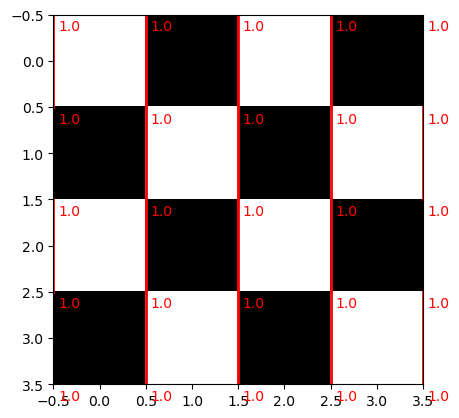

In [128]:
w, weight = good_ones[0]
print(weight)
w.draw()

0.09272850041932164


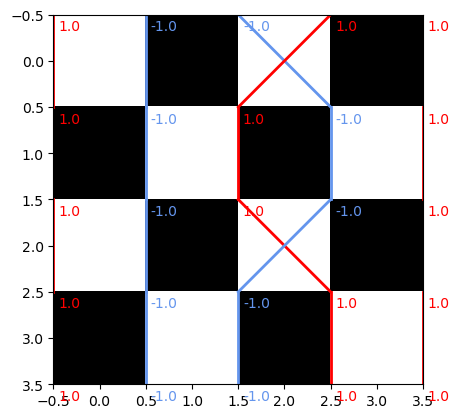

In [129]:
rng = np.random.default_rng()
w, weight = rng.choice(good_ones)
print(weight)
w.draw()

IndexError: index 4 is out of bounds for axis 0 with size 4

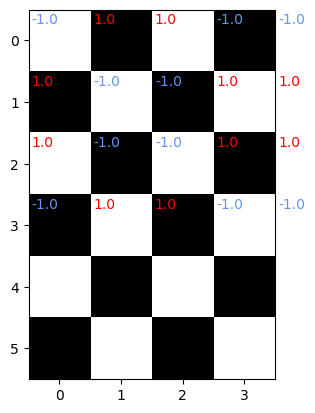

In [118]:
spins = np.array(
    [
        [-1., 1., 1., -1.],
        [1., -1., -1., 1.],
        [1., -1., -1., 1.],
        [-1., 1., 1., -1.]])
w = Wordline(p, spins)
w.draw()

In [ ]:
w._compute_weight()

np.float64(1.0000006666668672e-12)

1.0020020013340005


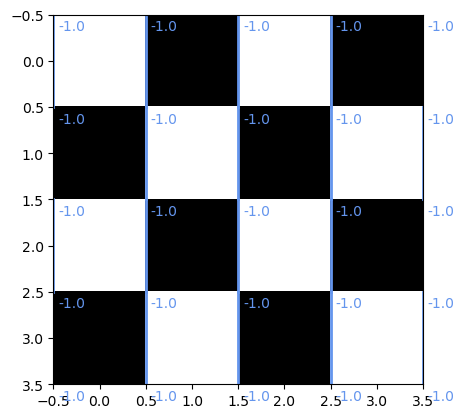

In [ ]:
w, weight = good_ones[15]

print(weight)
w.draw()